# Regresi Linier - Satu Luaran, Banyak Prediktor

Penggunaan regresi linier tentu bisa diperluas menjadi banyak prediktor, kita bisa menyebut ini sebagai _multivariate linear regression_ atau regresi linier multivariat. Perluasan ini direpresentasikan dengan persamaan di bawah ini dengan $p$ adalah jumlah prediktor/fitur yang terkait dalam dataset.

\begin{equation}
Y \approx \beta_0 + \beta_1 x_{:,1} + \beta_2 x_{:,2} + \dots + \beta_p x_{:,p}
\end{equation}

atau dalam bentuk vektor

\begin{equation}
Y \approx
\begin{bmatrix}
\beta_0 & \beta_1 & ... & \beta_p  
\end{bmatrix}
\begin{bmatrix}
1 \\ x_{:,1} \\ x_{:,2} \\ \vdots \\ x_{:,p} 
\end{bmatrix}
\end{equation}


Secara umum, konsep untuk memilih parameter $\beta$ masih sama dengan sebelumnya, yakni dengan meminimasi RSS. 
Sebelumnya, RSS memiliki formula:
\begin{equation}
RSS = \sum_{i=1}^n {(y_i - \hat{\beta_0} - \hat{\beta_1} {x_i})^2}
\end{equation}

Sekarang menjadi (kita anggap $x_0$ adalah 1)
\begin{equation}
RSS = \sum_{i=1}^n  {(y_i - \sum_{j=0}^p \hat{\beta_j} {x_{i,j}})^2}
\end{equation}

Hanya saja pertanyaan yang muncul adalah kombinasi prediktor manakah yang paling baik untuk menentukan prediksi terhadap variabel target? Mari kita lihat dengan contoh kasus dengan dataset Wine Quality

## Penggunaan Regresi Linier Multivariat

Dalam contoh kasus ini kita akan menggunakan dataset Red Wine Quality yang bisa diambil di "Data\Regression\Wine Quality\winequality-red.csv"

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("Data\Regression\Wine Quality\winequality-red.csv",delimiter=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
print(data.shape)

(1599, 12)


Variabel target yang akan kita prediksi adalah quality. Meskipun tipe datanya adalah bilangan bulat (integer), kita masih bisa menerapkan regresi terhadap dataset ini dengan pembulatan pada akhirnya. Mari kita lihat sejenak karakteristik dataset ini dengan plot histogram dan ringkasan statistiknya dengan describe.

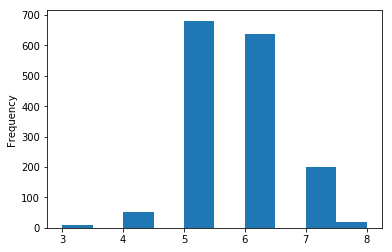

In [26]:
plt.figure()
data['quality'].plot.hist()
plt.show()

In [27]:
data['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

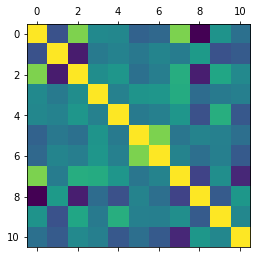